## Week 6: Assignment

## K-means Clustering

In [1]:
#Import libraries required
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

**(1a) Load the data file 'kmc-data1.csv' and visualize the data.**

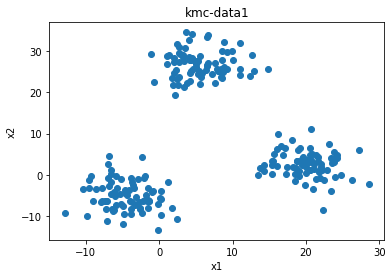

In [2]:
# Write code here
kmc_data1 = np.loadtxt('kmc-data1.csv', delimiter=',')

plt.scatter(kmc_data1[:,0],kmc_data1[:,1])
plt.title('kmc-data1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show();

**(1b) Consider the case where K=1. Take centre as $[6.67,8.33]$ and calculate Within Cluster Sum of Squares (WCSS)**

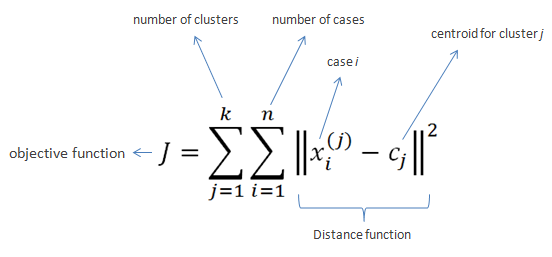

In [3]:
# Write code here
centroidk1 = np.array([6.67,8.33])
wcssk1 = np.sum((kmc_data1-centroidk1)**2)
wcssk1

73409.43272669788

**(1c) Write a function to find which class each point belongs to given the centroids and value of K**

Hint: data has dimensions (m x n), centroids has dimensions (K x n)

In [4]:

def get_class(data,centroids,K):
    '''size = data.shape[0]
    data_class = np.zeros([size]) #Create an array to store classes of each data
    #Your code here
    for i in range(size):
        dists = np.zeros(K)
        for j in range(K):
            dist = np.sum((data[i]-centroids[j])**2)**0.5
            dists[j] = dist
        
        cls = np.where(dists == np.amax(dists))[0][0]
        data_class[i] = cls'''
    
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    data_class = np.argmin(distances, axis=0)
    return(data_class)

**(1d) Write a function to find the centroids given the data points and the corresponding class**

In [5]:
def get_centroids(data,data_class,K):
    dim = data.shape[1] #The number of columns in data
    centroids = np.zeros((K,dim))
    #Your code here
    for i in range(K):
        centroids[i] = np.mean(data[data_class==i],axis=0)
    return(centroids)

**(1e) Write a function to calculate WCSS given the data points, the centroids and K** 

In [6]:
def get_wcss(data,centroids,K):
    wcss_clusterwise = np.zeros([K]) #Array to store WCSS of individual clusters
    #Your code here
    data_class = get_class(data,centroids,K)
    for i in range(K):
        wcss_clusterwise[i] = np.sum((data[data_class==i]-centroids[i])**2)
    
    wcss = np.sum(wcss_clusterwise) 
    return(wcss)

**K Means Algorithm:<br>**
    1) Allocate a class to each data point given the initial centroids<br>
    2) Calculate the new centroids,i.e, the mean of the data points in each class<br>
    3) Iterate till the stopping criteria. In our case the algorithm stops when the shift in each centroid is less than tolerance<br>
    

**(1f) Let $K = 3$ and the initial cluster centroids be $[10,30], [25,-5]$ and $[-5,10]$ and write a function to implement K-means clustering using functions defined above. Plot the final clusters with K-means clustering.<br> Take tolerance as $0.001$**

In [7]:
K = 3
centroids = np.array([[10,30],[25,-5],[-5,10]])
tol = 0.001
def kmeans(data,K,centroids,tol):
    # Write code here
    wcss0 = get_wcss(data,centroids,K)
    data_class = get_class(data,centroids,K)
    while True:
        data_class = get_class(data,centroids,K)
        centroids = get_centroids(data,data_class,K)
        wcss = get_wcss(data,centroids,K)
        if abs(wcss-wcss0)<tol:
            break
        wcss0 = wcss
    return data_class, centroids

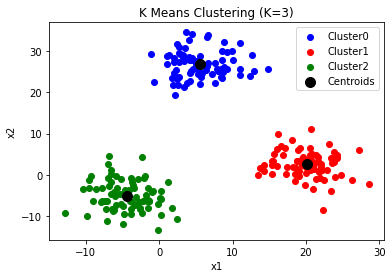

In [8]:
data_class, centroids = kmeans(kmc_data1,K,centroids,tol)
colors = ['blue','red','green']


for i in range(K):
    points = kmc_data1[data_class==i]
    lbl = 'Cluster'+str(i)
    plt.scatter(points[:, 0], points[:, 1], color = colors[i], label = lbl)
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', s=100, label = 'Centroids')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K Means Clustering (K=3)')
plt.show();

**(1g) Compute the sum of square distance of each point from the cluster centroid.**

In [9]:
#  Write code here
print('sum of square distance of each point from the cluster centroid = %.2f' %get_wcss(kmc_data1,centroids,K))

sum of square distance of each point from the cluster centroid = 4936.72


**(1h) Repeat the above exercise for $K = 1,2,3,4$. You can use appropriate initial centroids based on the visualization**

**Plot the final clusters (for $K = 1,2,3,4$) and report the sum of square distance of each point from the cluster mean. Give your observations.**

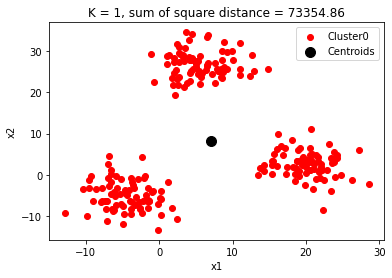

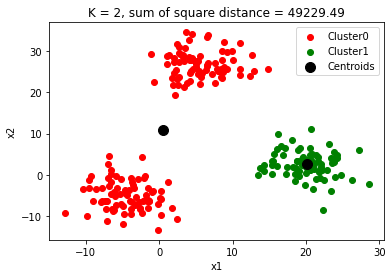

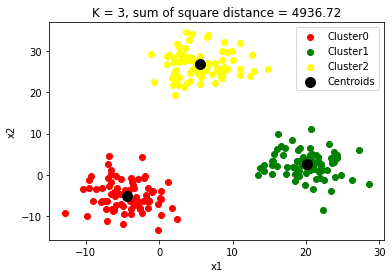

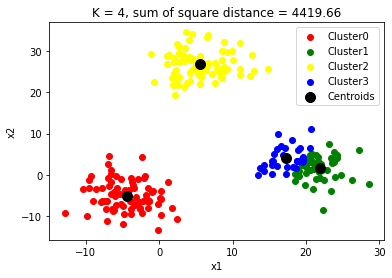

In [10]:
#  Write code here
colors = ['red','green','yellow','blue']


#for K=1
K=1
centroids=np.array([[10,10]])
data_class, centroids = kmeans(kmc_data1,K,centroids,tol=0.001)
for i in range(K):
    points = kmc_data1[data_class==i]
    lbl = 'Cluster'+str(i)
    plt.scatter(points[:, 0], points[:, 1], color = colors[i], label = lbl)
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', s=100, label = 'Centroids')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K = %d, sum of square distance = %.2f' %(K,get_wcss(kmc_data1,centroids,K)))
plt.show();


#for K=2
K=2
centroids=np.array([[0,10],[20,10]])
data_class, centroids = kmeans(kmc_data1,K,centroids,tol=0.001)
for i in range(K):
    points = kmc_data1[data_class==i]
    lbl = 'Cluster'+str(i)
    plt.scatter(points[:, 0], points[:, 1], color = colors[i], label = lbl)
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', s=100, label = 'Centroids')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K = %d, sum of square distance = %.2f' %(K,get_wcss(kmc_data1,centroids,K)))
plt.show();


#for K=3
K=3
centroids=np.array([[0,10],[20,10],[10,30]])
data_class, centroids = kmeans(kmc_data1,K,centroids,tol=0.001)
for i in range(K):
    points = kmc_data1[data_class==i]
    lbl = 'Cluster'+str(i)
    plt.scatter(points[:, 0], points[:, 1], color = colors[i], label = lbl)
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', s=100, label = 'Centroids')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K = %d, sum of square distance = %.2f' %(K,get_wcss(kmc_data1,centroids,K)))
plt.show();


#for K=4
K=4
centroids=np.array([[0,10],[20,10],[10,30],[10,10]])
data_class, centroids = kmeans(kmc_data1,K,centroids,tol=0.001)
for i in range(K):
    points = kmc_data1[data_class==i]
    lbl = 'Cluster'+str(i)
    plt.scatter(points[:, 0], points[:, 1], color = colors[i], label = lbl)
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', s=100, label = 'Centroids')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K = %d, sum of square distance = %.2f' %(K,get_wcss(kmc_data1,centroids,K)))
plt.show();

3 clusters seem to be the most appropriate as it is clear from the plot that the data is segregated into three clusters, with sum of square distances of each point from the cluster mean = 4936.

**(2a) Load the data from the file 'kmc-data2.csv' and visualize the data on a scatter plot.**

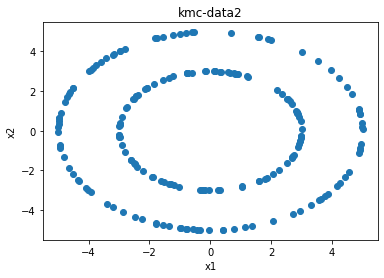

In [11]:
# Write code here
kmc_data2 = np.loadtxt('kmc-data2.csv', delimiter=',')

plt.scatter(kmc_data2[:,0],kmc_data2[:,1])
plt.title('kmc-data2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show();

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. (You can use scikit-learn library for to perform clustering)**

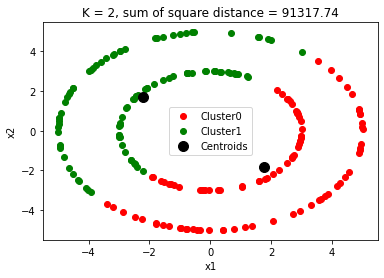

In [12]:
#  Write code here
from sklearn.cluster import KMeans

K=2
kms = KMeans(n_clusters=K, random_state=0).fit(kmc_data2)
centroids = kms.cluster_centers_
data_class = kms.labels_
for i in range(K):
    points = kmc_data2[data_class==i]
    lbl = 'Cluster'+str(i)
    plt.scatter(points[:, 0], points[:, 1], color = colors[i], label = lbl)
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', s=100, label = 'Centroids')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K = %d, sum of square distance = %.2f' %(K,get_wcss(kmc_data1,centroids,K)))
plt.show();

**(2c) Suppose you want to identify two ring clusters as visualised in the scatter plot. Now, transform the data such that K-means clustering identifies the two ring clusters.**

Hint: The points in the inner circle have the same radius and so do the points on the outer circle. This can be an effective way to cluster those points. Now think of transforming the 2D data to 1D data and then cluster.

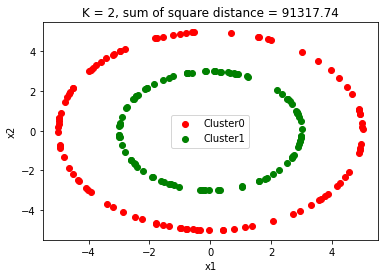

In [13]:
#  Write code here
#We use the radius to cluster the data
radii = np.linalg.norm(kmc_data2,axis=1).reshape(-1,1)
K=2
kms = KMeans(n_clusters=K, random_state=0).fit(radii)
data_class = kms.labels_

for i in range(K):
    points = kmc_data2[data_class==i]
    lbl = 'Cluster'+str(i)
    plt.scatter(points[:, 0], points[:, 1], color = colors[i], label = lbl)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='k', s=100, label = 'Centroids')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K = %d, sum of square distance = %.2f' %(K,get_wcss(kmc_data1,centroids,K)))
plt.show();

**(3) Perform K-means clustering on Bank note dataset (attached) which is a classification dataset. Split the data into test and train (80:20 ratio with random seed=0). Perform clustering on the training data and predict labels for test data based on the clusters obtained. Compare the predictions with actual labels and report accuracy. (You can use scikit-learn library for K-means and train-test split and accuracy)**

In [14]:
#  Write code here
from sklearn.metrics import accuracy_score
# Loading Data
banknote_data = np.loadtxt('data_banknote_authentication.csv',delimiter=',')
banknote_data


#Splitting data into training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(banknote_data[:,:-1], banknote_data[:,-1], test_size=0.2, random_state = 5, shuffle=True)
print('X_train shape =',X_train.shape,'| y_train shape =',y_train.shape,'\nX_test shape =',X_test.shape,'| y_test shape =',y_test.shape)

K=2
kms = KMeans(n_clusters=K,random_state=0).fit(X_train)
test_pred = kms.predict(X_test)
print('Prediction accuracy on test set =',accuracy_score(y_test,test_pred))

X_train shape = (1097, 4) | y_train shape = (1097,) 
X_test shape = (275, 4) | y_test shape = (275,)
Prediction accuracy on test set = 0.5963636363636363


## Logistic Regression

Logistic Regression uses the sigmoid function for binary classification. 

**(4a) Plot the sigmoid function $\frac{1}{1+e^{-x}}$ for x in the range [-20,20] at 100 equally spaced values. This exercise will help you understand the shape of the sigmoid function and show its relevance in binary classification problems**

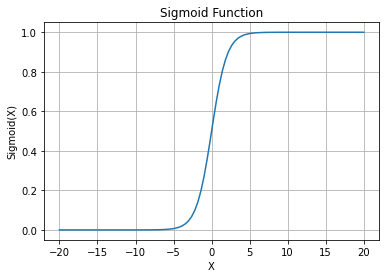

In [15]:
# Defining sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#generating x and sigmoid(x)
x = np.linspace(-20,20,100)
y = sigmoid(x)

#Plotting the function
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Sigmoid(X)')
plt.title('Sigmoid Function')
plt.grid()
plt.show();

**(4b) Comment on the nature of the sigmoid function graph (specifically : domain,range,behaviour in extreme inputs).**

Domain of sigmoid function: $\mathbb{R}$<br>
Range of sigmoid function: (0,1)<br>
For extreme inputs: As $x \rightarrow \infty \Rightarrow sigmoid(x) \rightarrow 1$<br>
As $x \rightarrow -\infty \Rightarrow sigmoid(x) \rightarrow 0$

**(4c) Using the derivative formula of sigmoid function, plot the gradients of the sigmoid function for the 100 values in the range [-20,20].**

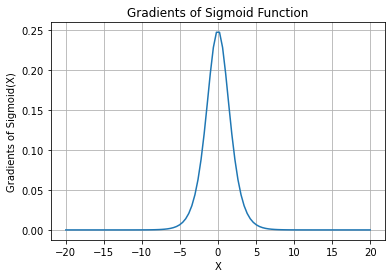

In [16]:

#Derivative of sigmoid(x) = sigmoid(x)(1-sigmoid(x))
sig_der = sigmoid(x)*(1-sigmoid(x))

#Plotting the function
plt.plot(x,sig_der)
plt.xlabel('X')
plt.ylabel('Gradients of Sigmoid(X)')
plt.title('Gradients of Sigmoid Function')
plt.grid()
plt.show();

**Consider the given data X_logistic.txt and y_logistic.txt. Perform random shuffle and then split the data as train-validation-test sets in the ratio of 80:10:10. Note that the y value gives the class label (0 or 1).** 

**(5a) Implement logistic regression (using only numpy) to predict whether the test datapoints belong to class 0 or 1. Gradient descent also has to be implemented using numpy. Choose the best learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 by using validation dataset. Using the chosen model (best learning rate and number of iterations), report the prediction accuracy on test data. Use a random initialization of weights.**



In [17]:
#Loading Data
xlogistic = np.loadtxt('X_logistic.txt')
ylogistic = np.loadtxt('y_logistic.txt')

#Splitting data into training, validation and testing sets
X_train, X_val, y_train, y_val = train_test_split(xlogistic, ylogistic, test_size=0.2, random_state = 5, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

print('X_train shape =',X_train.shape,'| y_train shape =',y_train.shape,'\nX_val shape =', X_val.shape,'| y_val shape =', y_val.shape, '\nX_test shape =',X_test.shape,'| ny_test shape =',y_test.shape)

X_train shape = (80, 2) | y_train shape = (80,) 
X_val shape = (10, 2) | y_val shape = (10,) 
X_test shape = (10, 2) | ny_test shape = (10,)


In [18]:
#Defining the gradient descent function

def logistic_gradient_descent(X,y,learning_rate,num_iter):
    m = y.shape[0]
    y.reshape(-1,1)
    theta = np.zeros(X.shape[1]) #Initializing parameters
    b = 0 #Initializing parameters
    J_history=[] #History of loss
    alpha = learning_rate
    for i in range(num_iter):
        h = sigmoid(np.dot(X_train,theta)+b) 
        theta = theta - (alpha/m)*np.dot(X.T,(h-y))
        b = b - (alpha/m)*np.sum(h-y)
        J = (-1/m)*(np.dot(y,np.log10(h))+np.dot(1-y,1-np.log10(h)))
        J_history.append(J)
    
    return theta,b,J_history

In [19]:
# Report accuracy 
from sklearn.metrics import f1_score, confusion_matrix
learning_rates = [0.001,0.01,0.1]
num_iters = [50, 100, 1000]

for learning_rate in learning_rates:
    for num_iter in num_iters:
        theta,b,J_history = logistic_gradient_descent(X_train, y_train, learning_rate=learning_rate, num_iter=num_iter)
        yhat = np.around(sigmoid(np.dot(X_val,theta)+b))
        f1 = f1_score(y_val,yhat)
        acc = 1-np.sum(abs(y_val-yhat))/y_val.shape[0]
        print('For learning rate = %.3f, number of iterations = %d:' %(learning_rate,num_iter))
        print('Validation accuracy = %.3f' %acc)
        print('F1 score = %.3f\n' %f1)


For learning rate = 0.001, number of iterations = 50:
Validation accuracy = 0.300
F1 score = 0.462

For learning rate = 0.001, number of iterations = 100:
Validation accuracy = 0.300
F1 score = 0.462

For learning rate = 0.001, number of iterations = 1000:
Validation accuracy = 0.300
F1 score = 0.462

For learning rate = 0.010, number of iterations = 50:
Validation accuracy = 0.300
F1 score = 0.462

For learning rate = 0.010, number of iterations = 100:
Validation accuracy = 0.300
F1 score = 0.462

For learning rate = 0.010, number of iterations = 1000:
Validation accuracy = 1.000
F1 score = 1.000

For learning rate = 0.100, number of iterations = 50:
Validation accuracy = 1.000
F1 score = 1.000

For learning rate = 0.100, number of iterations = 100:
Validation accuracy = 1.000
F1 score = 1.000

For learning rate = 0.100, number of iterations = 1000:
Validation accuracy = 1.000
F1 score = 1.000



Best learning rate = 0.1 and num iter = 50 or 100 is enough for the considered validation set

In [20]:
#On test set
theta,b,J_history = logistic_gradient_descent(X_train, y_train, learning_rate=0.1, num_iter=100)
yhat = np.around(sigmoid(np.dot(X_test,theta)+b))
f1 = f1_score(y_test,yhat)
acc = 1-np.sum(abs(y_test-yhat))/y_test.shape[0]
print('For learning rate = 0.1, number of iterations = 100:')
print('Test accuracy = %.3f' %acc)
print('F1 score = %.3f' %f1)

For learning rate = 0.1, number of iterations = 100:
Test accuracy = 1.000
F1 score = 1.000


**(5b) Plot the logistic regression classifier (decision boundary) on a 2d plot and include the train and test datapoints on the plot in different colours.
(Say dark green for class 0 test datapoints and dark red for class 1 test datapoints. Similarly, light green and light red for train datapoints).**

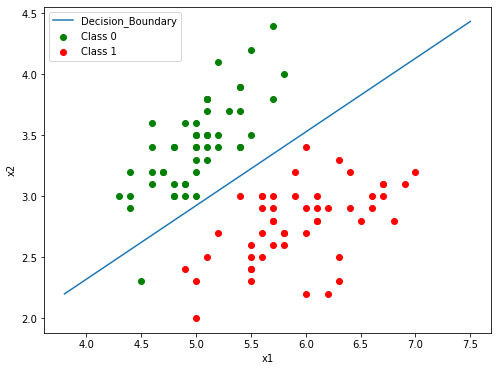

In [21]:
# Code here
# getting the x co-ordinates of the decision boundary
plot_x = np.array([min(xlogistic[:,0]) - 0.5, max(xlogistic[:,0]) + 0.5])
# getting corresponding y co-ordinates of the decision boundary
plot_y = (-1/theta[1]) * (theta[0] * plot_x + b)



xlog0 = xlogistic[ylogistic==0]
xlog1 = xlogistic[ylogistic==1]

plt.figure(figsize=(8,6))
plt.plot(plot_x, plot_y, label = "Decision_Boundary")

plt.scatter(xlog0[:,0],xlog0[:,1],color='green',label='Class 0')
plt.scatter(xlog1[:,0],xlog1[:,1],color='red',label='Class 1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

plt.show();

**(6) Consider the bank note dataset provided. Perform random shuffle and train-test split(80:20). Using sklearn, implement logistic regression to predict whether the test datapoints belong to class 0 or 1. Report the prediction accuracy on test data.**

In [22]:
# Loading Data
banknote_data = np.loadtxt('data_banknote_authentication.csv',delimiter=',')
banknote_data


#Splitting data into training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(banknote_data[:,:-1], banknote_data[:,-1], test_size=0.2, random_state = 5, shuffle=True)
print('X_train shape =',X_train.shape,'| y_train shape =',y_train.shape,'\nX_test shape =',X_test.shape,'| ny_test shape =',y_test.shape)

#Performing logistic regression using sklearn

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
ytest_pred = clf.predict(X_test)


X_train shape = (1097, 4) | y_train shape = (1097,) 
X_test shape = (275, 4) | ny_test shape = (275,)


In [23]:
# Report accuracy here
acc = clf.score(X_test,y_test)
f1 = f1_score(y_test,ytest_pred)
print('Test Accuracy = %.3f\nF1 score = %.3f' %(acc,f1))

Test Accuracy = 0.993
F1 score = 0.992
